## Random Forest

### Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix 

### Prepare data

In [2]:
train_features = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')

test_features = pd.read_csv('test_features.csv')
test_labels = pd.read_csv('test_labels.csv')

Survived = ['Not survived','Survived']

### Train model

#### Optimize the Random Forest Model

In [3]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))
        
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

best_rf=cv.best_estimator_

BEST PARAMS: {'max_depth': 8, 'n_estimators': 250}

0.81 (+/-0.044) for {'max_depth': 2, 'n_estimators': 5}
0.784 (+/-0.035) for {'max_depth': 2, 'n_estimators': 50}
0.782 (+/-0.053) for {'max_depth': 2, 'n_estimators': 250}
0.824 (+/-0.024) for {'max_depth': 4, 'n_estimators': 5}
0.83 (+/-0.036) for {'max_depth': 4, 'n_estimators': 50}
0.83 (+/-0.036) for {'max_depth': 4, 'n_estimators': 250}
0.813 (+/-0.026) for {'max_depth': 8, 'n_estimators': 5}
0.827 (+/-0.026) for {'max_depth': 8, 'n_estimators': 50}
0.831 (+/-0.029) for {'max_depth': 8, 'n_estimators': 250}
0.795 (+/-0.036) for {'max_depth': 16, 'n_estimators': 5}
0.803 (+/-0.037) for {'max_depth': 16, 'n_estimators': 50}
0.812 (+/-0.022) for {'max_depth': 16, 'n_estimators': 250}
0.78 (+/-0.043) for {'max_depth': 32, 'n_estimators': 5}
0.799 (+/-0.035) for {'max_depth': 32, 'n_estimators': 50}
0.809 (+/-0.032) for {'max_depth': 32, 'n_estimators': 250}
0.788 (+/-0.041) for {'max_depth': None, 'n_estimators': 5}
0.803 (+/-0.037)

### Test Model

#### Visualize the Confusion Matrix

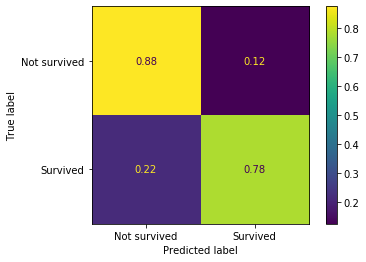

In [4]:
plot_confusion_matrix(
    best_rf, test_features, test_labels,
    display_labels=Survived,
    normalize='true')

#### Caluate the accuracy of the test data

In [5]:
print(
    'Accuracy on testing data: ' 
    + str("{:.2%}".format(best_rf.score(test_features, test_labels))))

Accuracy on testing data: 83.80%
